In [1]:
import numpy as np
from collections import Counter

In [2]:
def compute_gini(labels):
    m = len(labels)
    c = Counter(labels)
    probs = [ c[i]/m for i in set(labels)]
    return sum([p*(1 - p) for p in probs])
    

In [3]:
labels = [0,0,1,1,1,2,2]
compute_gini(labels)
c = Counter(labels)

In [4]:
set(labels)

{0, 1, 2}

In [5]:
compute_gini(labels)

0.6530612244897959

In [9]:
def optimal_split(data,labels):
    
    m = len(data)
    x_coord = np.array(data)[:,0]
    y_coord = np.array(data)[:,1]
    
    midpoints = [0.5 * (data[i][0] + data[j][0]) for i in 
                range(m) for j in range(i+1,m)],\
                [0.5 * (data[i][1] + data[j][1]) for i in range(m)
                    for j in range(i+1,m)]
    
    exclusive_midpoints = [x for x in midpoints[0] if x not in x_coord],\
                          [y for y in midpoints[1] if y not in y_coord]
    
    splits = [(0,exclusive_midpoints[0][i]) for i in range(len(exclusive_midpoints[0]))] +\
    [(1,exclusive_midpoints[1][i]) for i in range(len(exclusive_midpoints[1]))]
    
    split_indices = []
    
    for s in splits:
        if s[0] == 0:
            L = [labels[i] for i in range(m) if data[i][0] <= s[1]]
            R = [labels[i] for i in range(m) if data[i][0] > s[1]]
            
            if len(L) > 0 and len(R) > 0:
                g = len(L) * compute_gini(L) +\
                len(R) * compute_gini(R)
                split_indices.append((s,g/m))
        else:
            
            L = [labels[i] for i in range(m) if data[i][1] <= s[1]]
            R = [labels[i] for i in range(m) if data[i][1] > s[1]]
            
            if len(L) > 0 and len(R) > 0:
                g = len(L) * compute_gini(L) +\
                len(R) * compute_gini(R)
                split_indices.append((s,g/m)) 
                

                
    return sorted(split_indices,key = lambda x: x[1])

In [10]:
data = [[1.,2.],[3.,3.],[-1.,2.],[6.,1.],[2.,2.],[3.,-1.],[3.,4.]]
labels = [0,0,1,1,1,2,2]

In [11]:
compute_gini(labels)

0.6530612244897959

In [15]:
    m = 7
    x_coord = np.array(data)[:,0]
    y_coord = np.array(data)[:,1]
    
    midpoints = [0.5 * (data[i][0] + data[j][0]) for i in 
                range(m) for j in range(i+1,m)],[
        0.5 * (data[i][1] + data[j][1]) for i in range(m)
        for j in range(i+1,m)]
    
#     print(midpoints)
    
    exclusive_midpoints = [x for x in midpoints[0] if x not in x_coord],\
    [y for y in midpoints[1] if y not in y_coord]
    
    print(exclusive_midpoints)
    
    splits = [(0,exclusive_midpoints[0][i]) for i in range(len(exclusive_midpoints[0]))] +\
    [(1,exclusive_midpoints[1][i]) for i in range(len(exclusive_midpoints[1]))]
    
    splits

([0.0, 3.5, 1.5, 4.5, 2.5, 2.5, 0.5, 4.0, 4.5, 4.5, 2.5, 2.5], [2.5, 1.5, 0.5, 2.5, 2.5, 3.5, 1.5, 0.5, 1.5, 0.0, 2.5, 0.5, 1.5])


[(0, 0.0),
 (0, 3.5),
 (0, 1.5),
 (0, 4.5),
 (0, 2.5),
 (0, 2.5),
 (0, 0.5),
 (0, 4.0),
 (0, 4.5),
 (0, 4.5),
 (0, 2.5),
 (0, 2.5),
 (1, 2.5),
 (1, 1.5),
 (1, 0.5),
 (1, 2.5),
 (1, 2.5),
 (1, 3.5),
 (1, 1.5),
 (1, 0.5),
 (1, 1.5),
 (1, 0.0),
 (1, 2.5),
 (1, 0.5),
 (1, 1.5)]

In [11]:
optimal_split(data,labels)

[((1, 0.5), 0.5238095238095238),
 ((1, 3.5), 0.5238095238095238),
 ((1, 0.5), 0.5238095238095238),
 ((1, 0.0), 0.5238095238095238),
 ((1, 0.5), 0.5238095238095238),
 ((1, 2.5), 0.5428571428571429),
 ((1, 2.5), 0.5428571428571429),
 ((1, 2.5), 0.5428571428571429),
 ((1, 2.5), 0.5428571428571429),
 ((0, 2.5), 0.5476190476190477),
 ((0, 2.5), 0.5476190476190477),
 ((0, 2.5), 0.5476190476190477),
 ((0, 2.5), 0.5476190476190477),
 ((0, 0.0), 0.5714285714285714),
 ((0, 3.5), 0.5714285714285714),
 ((0, 4.5), 0.5714285714285714),
 ((0, 0.5), 0.5714285714285714),
 ((0, 4.0), 0.5714285714285714),
 ((0, 4.5), 0.5714285714285714),
 ((0, 4.5), 0.5714285714285714),
 ((0, 1.5), 0.6),
 ((1, 1.5), 0.6),
 ((1, 1.5), 0.6),
 ((1, 1.5), 0.6),
 ((1, 1.5), 0.6)]

In [12]:
t=(1, 0.0)

In [13]:
def compute_nodes(s,data,labels):
    L = [ i for i in range(len(data)) if data[i][s[0]] <= s[1]]
    R = [ i for i in range(len(data)) if data[i][s[0]] > s[1]]
    
    L = [ data[i] for i in L],[labels[i] for i in L]
    R = [ data[i] for i in R],[labels[i] for i in R]
    
    return L, R

In [14]:
L,R = compute_nodes(t,data,labels)

In [15]:
L

([[3.0, -1.0]], [2])

In [16]:
R

([[1.0, 2.0], [3.0, 3.0], [-1.0, 2.0], [6.0, 1.0], [2.0, 2.0], [3.0, 4.0]],
 [0, 0, 1, 1, 1, 2])

In [17]:
t1 = optimal_split(R[0],R[1])

In [18]:
t1

[((1, 3.5), 0.39999999999999997),
 ((1, 2.5), 0.4166666666666667),
 ((1, 2.5), 0.4166666666666667),
 ((1, 2.5), 0.4166666666666667),
 ((1, 2.5), 0.4166666666666667),
 ((0, 0.0), 0.5333333333333333),
 ((0, 3.5), 0.5333333333333333),
 ((0, 4.5), 0.5333333333333333),
 ((0, 0.5), 0.5333333333333333),
 ((0, 4.0), 0.5333333333333333),
 ((0, 4.5), 0.5333333333333333),
 ((1, 1.5), 0.5333333333333333),
 ((1, 1.5), 0.5333333333333333),
 ((1, 1.5), 0.5333333333333333),
 ((0, 2.5), 0.5555555555555556),
 ((0, 2.5), 0.5555555555555556),
 ((0, 2.5), 0.5555555555555556),
 ((0, 1.5), 0.5833333333333334)]

In [19]:
L1,R1 = compute_nodes(t1[0][0],R[0],R[1])

In [20]:
L1

([[1.0, 2.0], [3.0, 3.0], [-1.0, 2.0], [6.0, 1.0], [2.0, 2.0]],
 [0, 0, 1, 1, 1])

In [21]:
R1

([[3.0, 4.0]], [2])

In [22]:
t2 = optimal_split(L1[0],L1[1])

In [23]:
t2

[((1, 2.5), 0.3),
 ((1, 2.5), 0.3),
 ((1, 2.5), 0.3),
 ((0, 0.0), 0.4),
 ((0, 3.5), 0.4),
 ((0, 4.5), 0.4),
 ((0, 0.5), 0.4),
 ((0, 4.0), 0.4),
 ((1, 1.5), 0.4),
 ((1, 1.5), 0.4),
 ((1, 1.5), 0.4),
 ((0, 1.5), 0.4666666666666667),
 ((0, 2.5), 0.4666666666666667),
 ((0, 2.5), 0.4666666666666667)]

In [24]:
L2,R2 = compute_nodes(t2[0][0],L1[0],L1[1])

In [25]:
L2

([[1.0, 2.0], [-1.0, 2.0], [6.0, 1.0], [2.0, 2.0]], [0, 1, 1, 1])

In [26]:
R2

([[3.0, 3.0]], [0])

In [27]:
t3 = optimal_split(L2[0],L2[1])

In [28]:
t3

[((0, 1.5), 0.25),
 ((0, 0.0), 0.33333333333333337),
 ((0, 3.5), 0.33333333333333337),
 ((0, 2.5), 0.33333333333333337),
 ((0, 0.5), 0.33333333333333337),
 ((0, 4.0), 0.33333333333333337),
 ((1, 1.5), 0.33333333333333337),
 ((1, 1.5), 0.33333333333333337),
 ((1, 1.5), 0.33333333333333337)]

In [29]:
L3,R3 = compute_nodes(t3[0][0],L2[0],L2[1])

In [30]:
L3

([[1.0, 2.0], [-1.0, 2.0]], [0, 1])

In [31]:
R3

([[6.0, 1.0], [2.0, 2.0]], [1, 1])

In [32]:
t4 = optimal_split(L3[0],L3[1])

In [33]:
t4

[((0, 0.0), 0.0)]

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
T = DecisionTreeClassifier()

In [20]:
T.fit(data,labels)

DecisionTreeClassifier()

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
data = np.array(data)

In [23]:
def plot_decision_boundary(data,labels,T):
    plot_step = 0.02
    x_min, x_max = data[:,0].min() -1, data[:,0].max() + 1
    y_min,y_max = data[:,1].min() -1 , data[:,1].max() + 1

    xx,yy = np.meshgrid(np.arange(x_min,x_max,plot_step),
                   np.arange(y_min,y_max,plot_step))
    Z = T.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx,yy,Z,cmap='cool')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Decision Boundary')

    plt.scatter(data[:,0],data[:,1],c=labels,cmap='hot',s=100)
    plt.show()

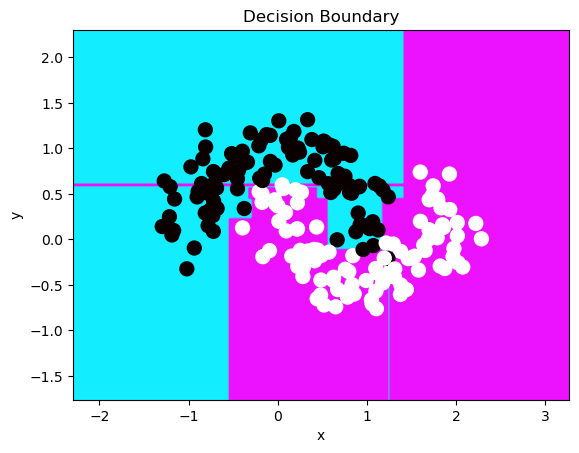

In [24]:
plot_decision_boundary(data,labels,T)

In [25]:
!pip install graphviz

In [26]:
import graphviz
from sklearn import tree

In [27]:
dot_data = tree.export_graphviz(T,out_file=None)

In [28]:
graph = graphviz.Source(dot_data)

In [29]:
dot_data = tree.export_graphviz(T,out_file=None)
graph = graphviz.Source(dot_data)
graph.render('Tree1')

'Tree1.pdf'

In [16]:
from sklearn.datasets import make_moons

data,labels = make_moons(200,noise=0.2)

In [17]:
plt.scatter(data[:,0],data[:,1],c=labels);

NameError: name 'plt' is not defined

In [48]:
T.fit(data,labels)

DecisionTreeClassifier()

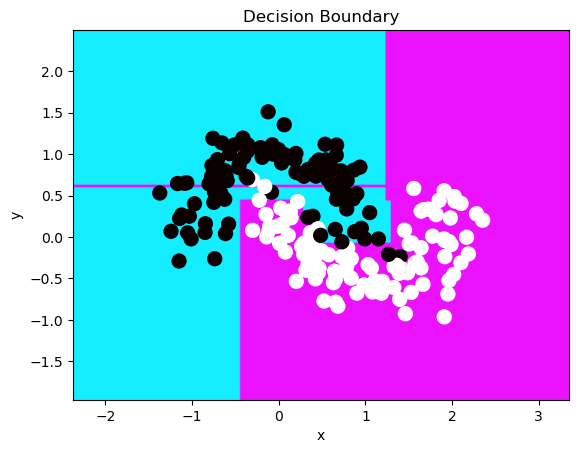

In [49]:
plot_decision_boundary(data,labels,T)

In [50]:
dot_data = tree.export_graphviz(T,out_file=None)
graph = graphviz.Source(dot_data)
graph.render('Tree2')

'Tree2.pdf'